In [ ]:
install.packages("reshape2")
install.packages("ggplot2")
install.packages("corrplot")
install.packages("dplyr")
install.packages("FNN")
install.packages("GGally")
library(reshape2)
library(ggplot2)
library(corrplot)
library(dplyr)
library(lattice)
library("GGally")

package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages
package 'FNN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages


Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [ ]:
df<- read.csv('forestfires.csv')
head(df)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [ ]:
str(df)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
summary(df)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

## Exploratory data analysis

## Numerical Variables 

In [ ]:
## Univariate analysis of all columns using a frequency plot  

In [ ]:
df_numerical <- df[,c(5:13)]
df_categorical <- df[ ,c(3:4)]

$breaks
 [1]  10  20  30  40  50  60  70  80  90 100

$counts
[1]   1   0   0   0   2   4   5  96 409

$density
[1] 0.0001934236 0.0000000000 0.0000000000 0.0000000000 0.0003868472
[6] 0.0007736944 0.0009671180 0.0185686654 0.0791102515

$mids
[1] 15 25 35 45 55 65 75 85 95

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


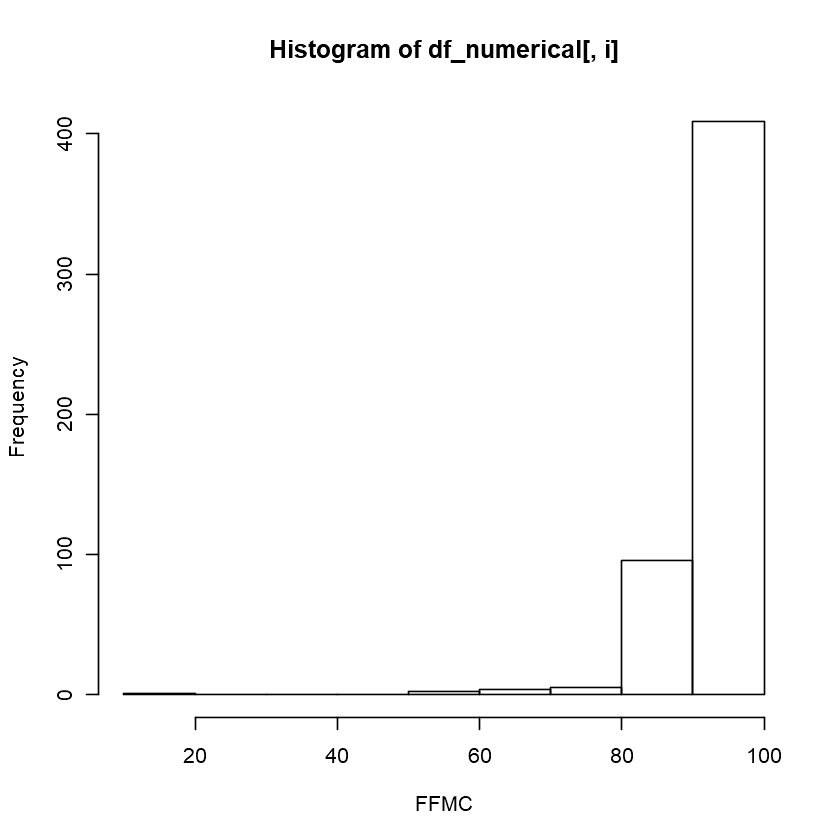

$breaks
 [1]   0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300

$counts
 [1] 38 48 40 19 83 74 76 50 19 19 11 18  6  9  7

$density
 [1] 0.0036750484 0.0046421663 0.0038684720 0.0018375242 0.0080270793
 [6] 0.0071566731 0.0073500967 0.0048355899 0.0018375242 0.0018375242
[11] 0.0010638298 0.0017408124 0.0005802708 0.0008704062 0.0006769826

$mids
 [1]  10  30  50  70  90 110 130 150 170 190 210 230 250 270 290

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


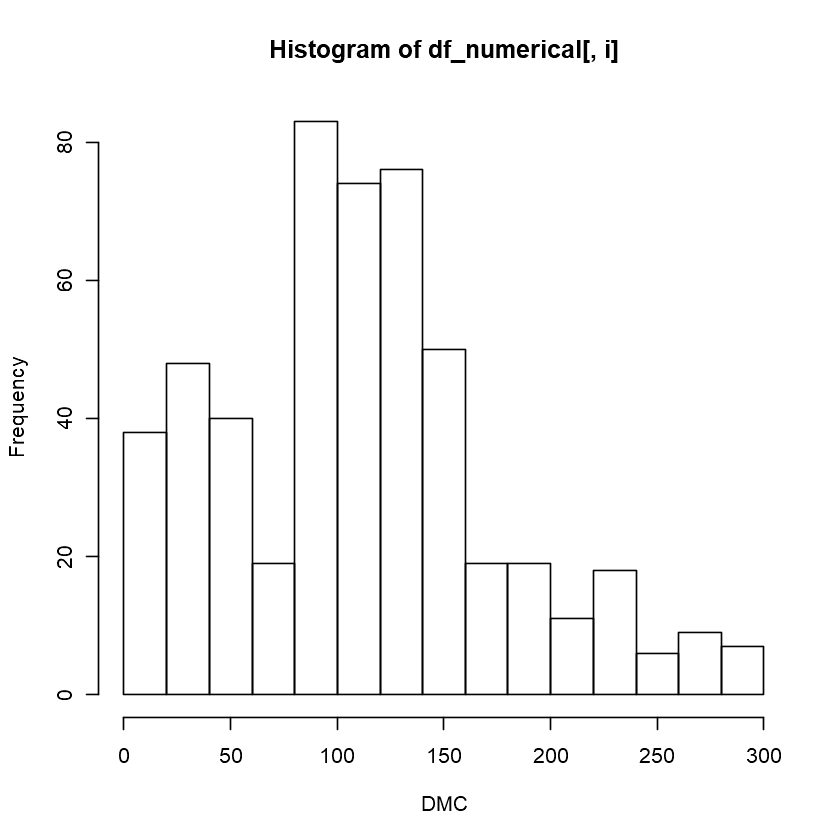

$breaks
 [1]   0 100 200 300 400 500 600 700 800 900

$counts
[1]  72  17  12  20  27  35 180 130  24

$density
[1] 0.0013926499 0.0003288201 0.0002321083 0.0003868472 0.0005222437
[6] 0.0006769826 0.0034816248 0.0025145068 0.0004642166

$mids
[1]  50 150 250 350 450 550 650 750 850

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


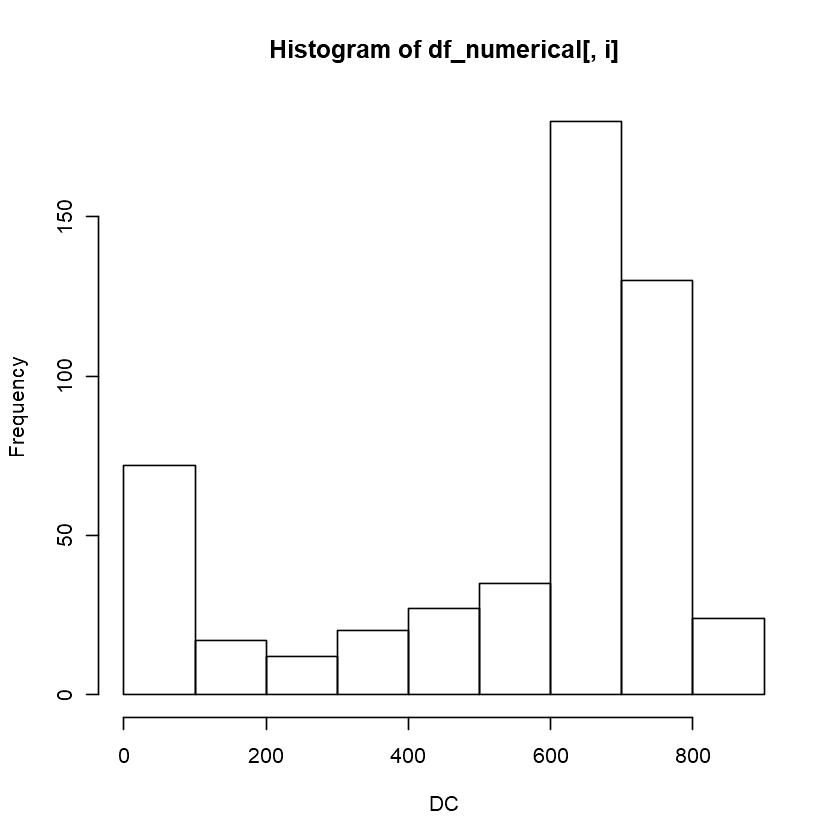

$breaks
 [1]  0  5 10 15 20 25 30 35 40 45 50 55 60

$counts
 [1]  70 292 112  35   7   0   0   0   0   0   0   1

$density
 [1] 0.0270793037 0.1129593810 0.0433268859 0.0135396518 0.0027079304
 [6] 0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.0000000000
[11] 0.0000000000 0.0003868472

$mids
 [1]  2.5  7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 52.5 57.5

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


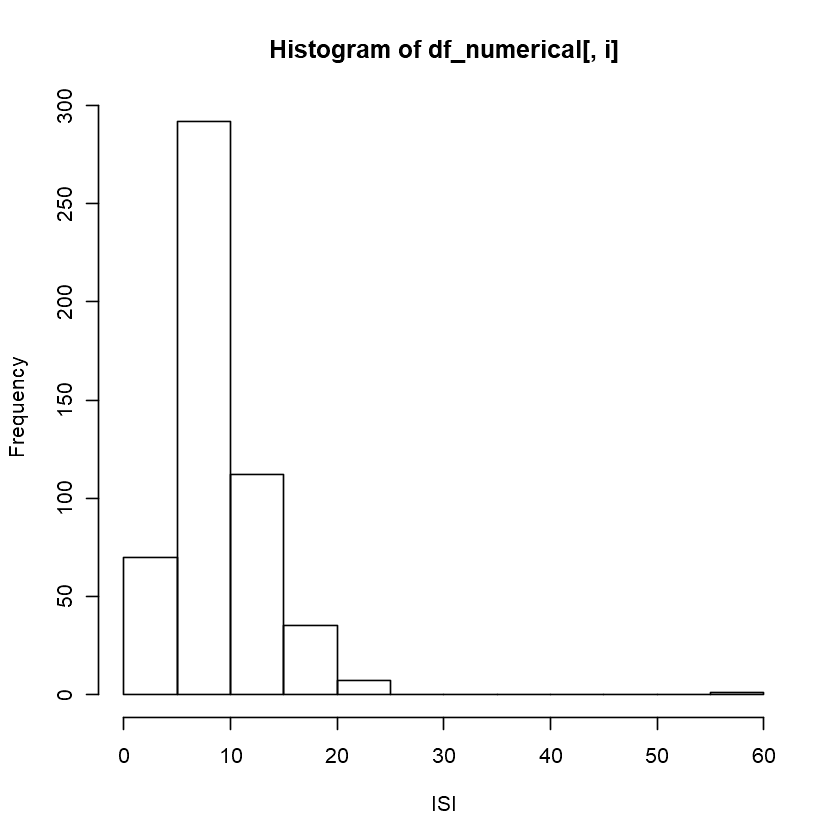

$breaks
[1]  0  5 10 15 20 25 30 35

$counts
[1]   9  27  77 173 166  52  13

$density
[1] 0.003481625 0.010444874 0.029787234 0.066924565 0.064216634 0.020116054
[7] 0.005029014

$mids
[1]  2.5  7.5 12.5 17.5 22.5 27.5 32.5

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


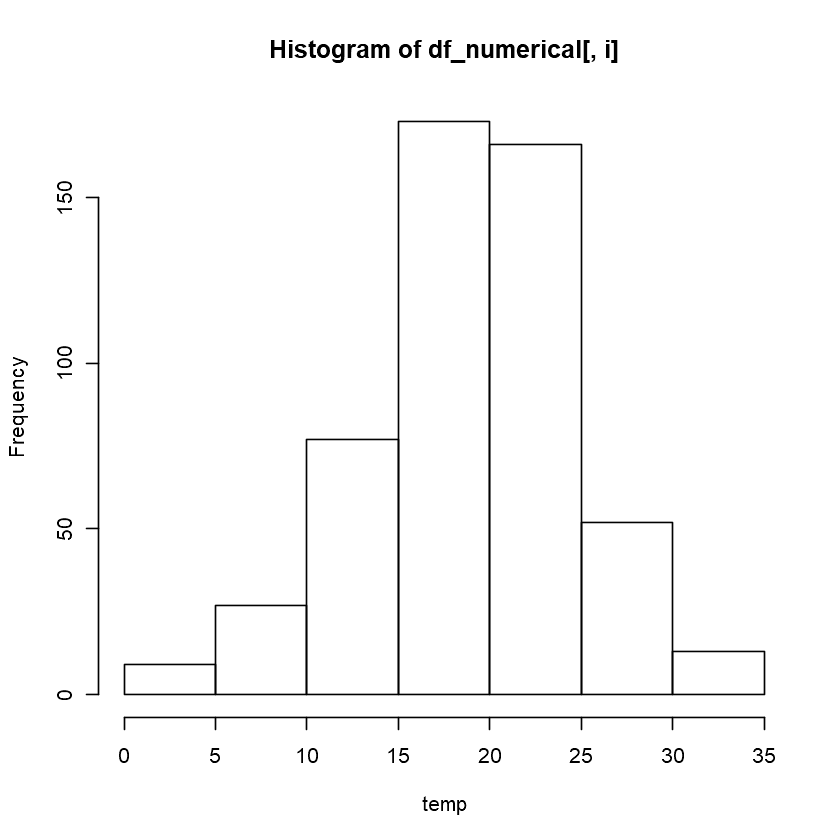

$breaks
 [1]  10  20  30  40  50  60  70  80  90 100

$counts
[1]   9 101 137 116  70  39  31   9   5

$density
[1] 0.001740812 0.019535783 0.026499033 0.022437137 0.013539652 0.007543520
[7] 0.005996132 0.001740812 0.000967118

$mids
[1] 15 25 35 45 55 65 75 85 95

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


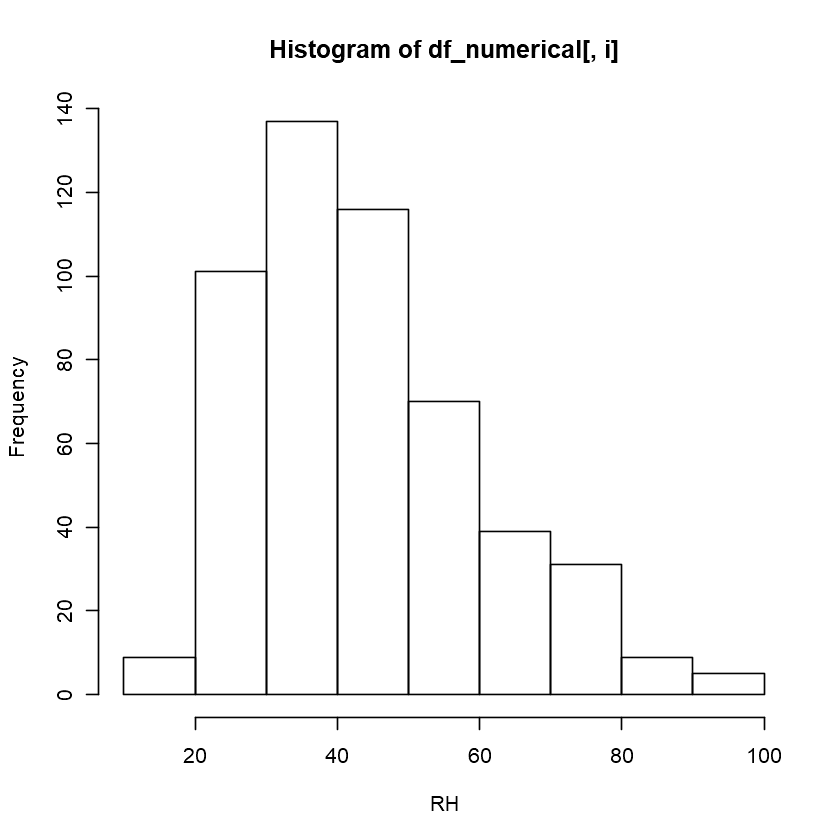

$breaks
 [1]  0  1  2  3  4  5  6  7  8  9 10

$counts
 [1]  14  45  97 144  89  65  27  23   9   4

$density
 [1] 0.027079304 0.087040619 0.187620890 0.278529981 0.172147002 0.125725338
 [7] 0.052224371 0.044487427 0.017408124 0.007736944

$mids
 [1] 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


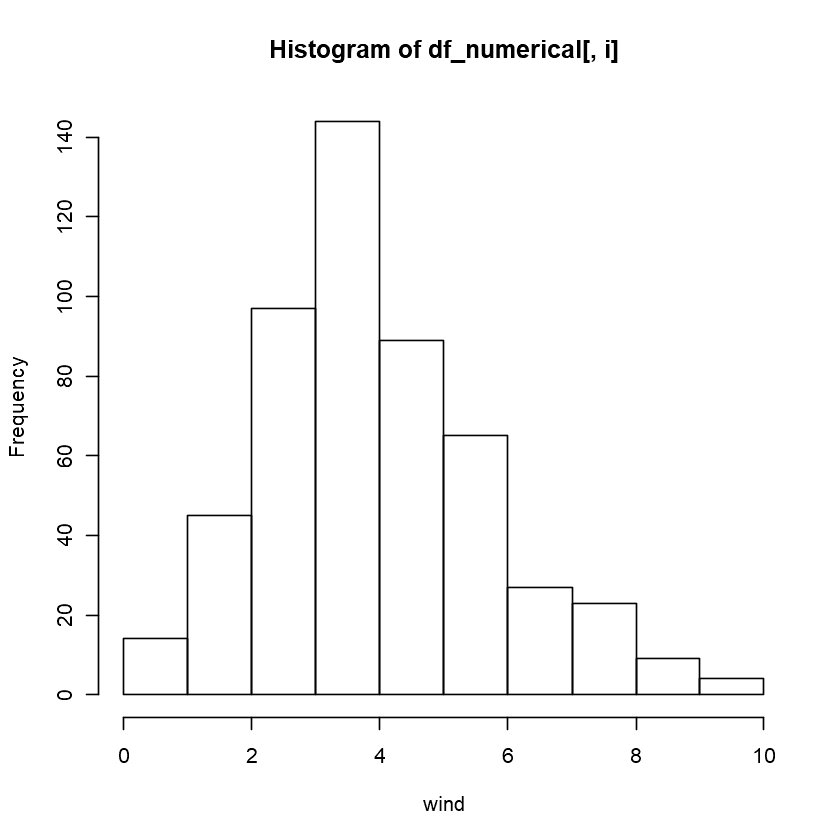

$breaks
 [1] 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5

$counts
 [1] 512   3   1   0   0   0   0   0   0   0   0   0   1

$density
 [1] 1.980657640 0.011605416 0.003868472 0.000000000 0.000000000 0.000000000
 [7] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[13] 0.003868472

$mids
 [1] 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


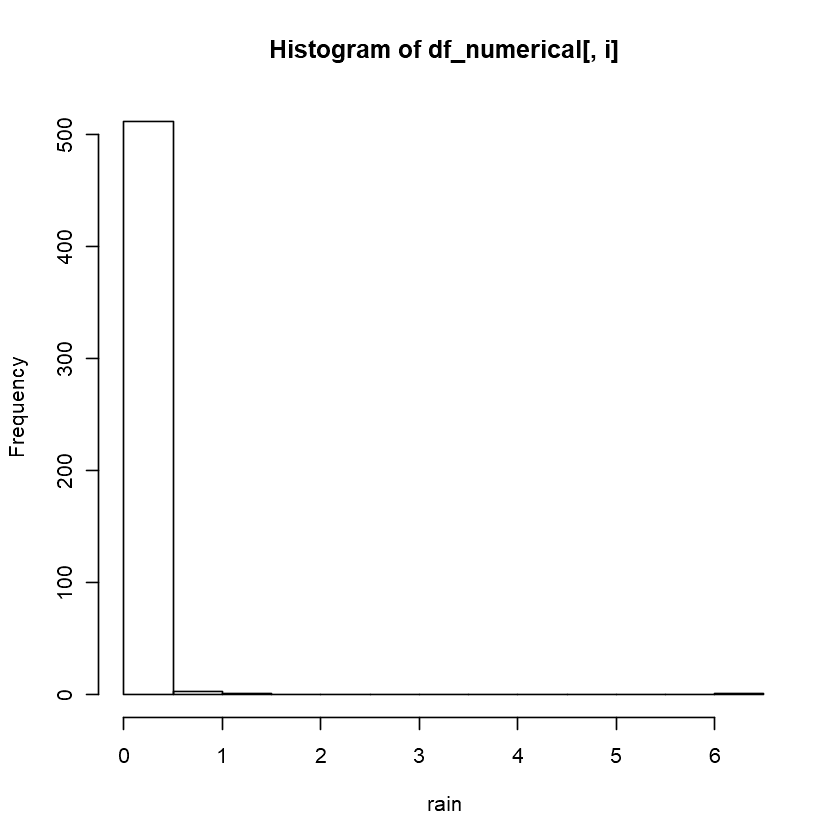

$breaks
 [1]    0  100  200  300  400  500  600  700  800  900 1000 1100

$counts
 [1] 506   6   3   0   0   0   0   1   0   0   1

$density
 [1] 9.787234e-03 1.160542e-04 5.802708e-05 0.000000e+00 0.000000e+00
 [6] 0.000000e+00 0.000000e+00 1.934236e-05 0.000000e+00 0.000000e+00
[11] 1.934236e-05

$mids
 [1]   50  150  250  350  450  550  650  750  850  950 1050

$xname
[1] "df_numerical[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


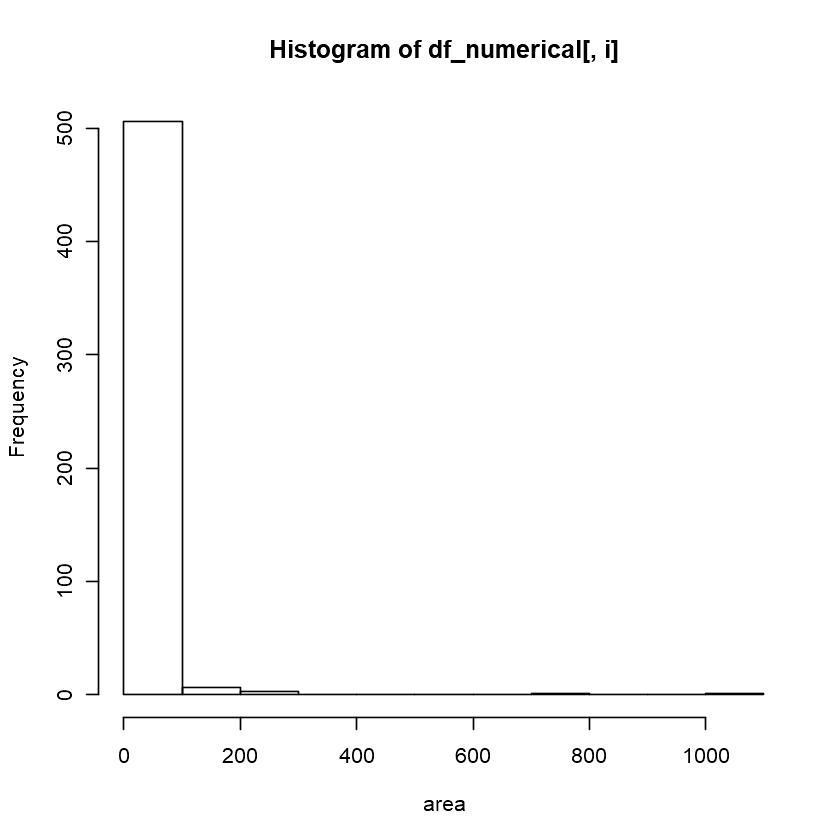

In [ ]:
a <- colnames(df_numerical)
for ( i in a){
    print(hist(df_numerical[,i], xlab = i))
}

#####  Observations
Temperature as  a  variable fairly follows a normal distribution whereas the rest of the variables have some sort of skewness as well as kurtosis. 
FFMC seems to be skewed to the left
Dmc roughly has a normal distribution 
DC Seems to be skewed to the left
ISI and RH AND RAIN has skewneess towards the right 
Wind and Temp follows a  normal distribution.

$stats
     [,1]
[1,] 86.2
[2,] 90.2
[3,] 91.6
[4,] 92.9
[5,] 96.2

$n
[1] 517

$conf
         [,1]
[1,] 91.41238
[2,] 91.78762

$out
 [1] 63.5 84.9 79.5 84.0 84.2 83.9 69.0 82.1 85.9 85.9 84.4 68.2 85.8 84.4 84.9
[16] 85.6 81.5 84.9 81.5 63.5 83.9 84.4 81.9 83.0 84.4 84.0 84.6 85.4 85.4 85.4
[31] 85.4 84.7 85.4 84.9 85.2 53.4 85.1 50.4 18.7 84.7 84.1 85.0 84.7 84.1 84.6
[46] 75.1 75.1 79.5 81.6 81.6 81.6 81.6 79.5

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



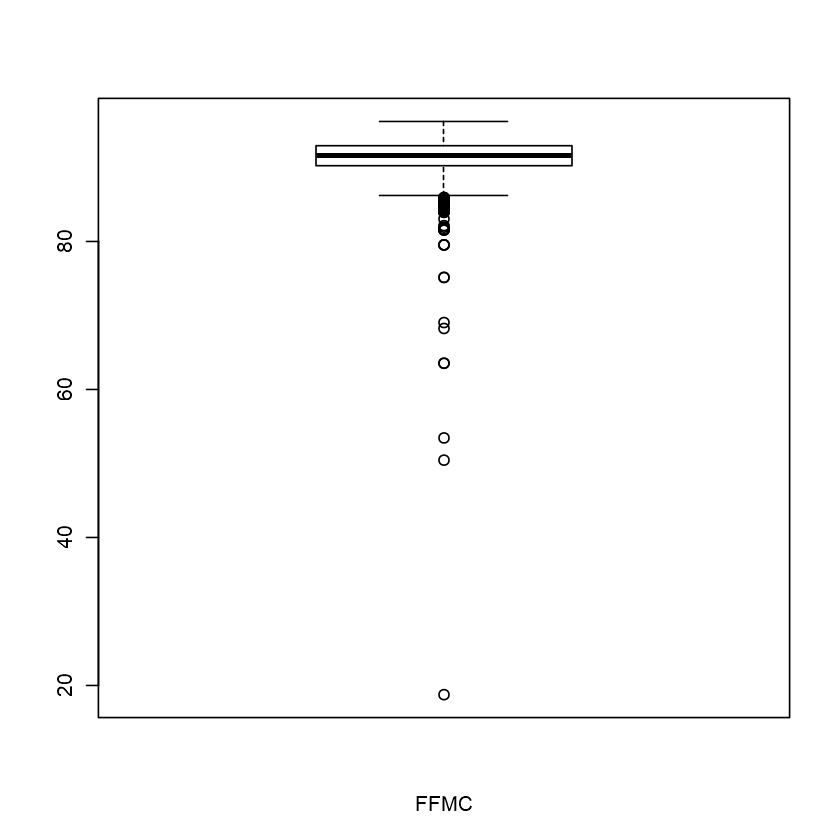

$stats
      [,1]
[1,]   1.1
[2,]  68.6
[3,] 108.3
[4,] 142.4
[5,] 248.4

$n
[1] 517

$conf
         [,1]
[1,] 103.1718
[2,] 113.4282

$out
 [1] 276.3 276.3 290.0 273.8 276.3 291.3 290.0 263.1 287.2 269.8 253.6 290.0
[13] 290.0 284.9 266.2 273.8 276.3

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



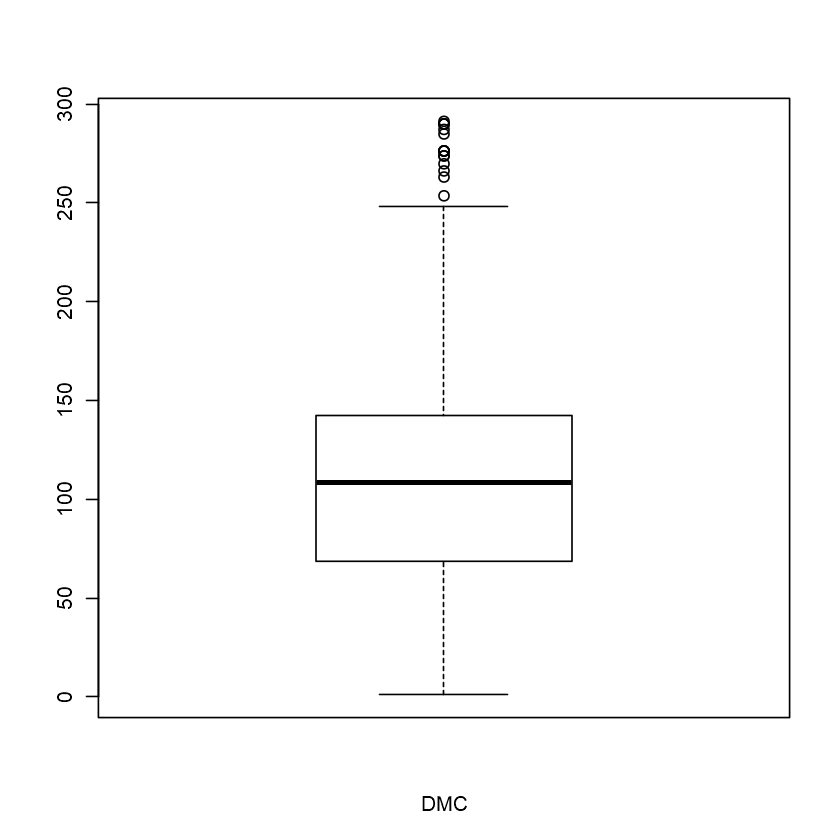

$stats
      [,1]
[1,]  25.6
[2,] 437.7
[3,] 664.2
[4,] 713.9
[5,] 860.6

$n
[1] 517

$conf
         [,1]
[1,] 645.0073
[2,] 683.3927

$out
[1] 15.5  9.3  7.9 18.7 15.8 16.2 16.2 15.3

$group
[1] 1 1 1 1 1 1 1 1

$names
[1] ""



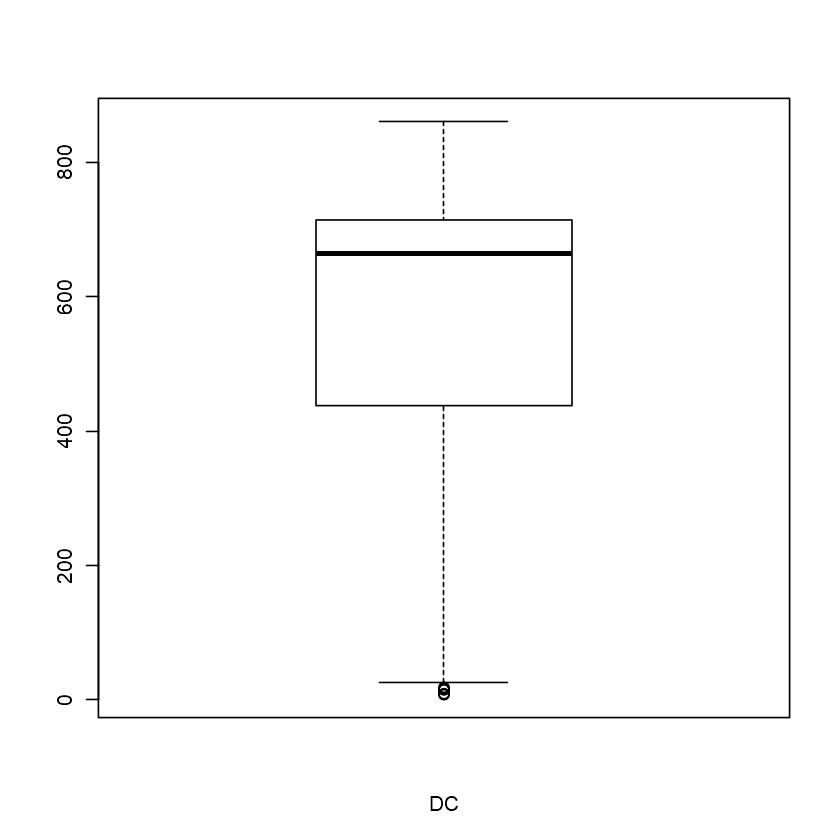

$stats
     [,1]
[1,]  0.4
[2,]  6.5
[3,]  8.4
[4,] 10.8
[5,] 17.0

$n
[1] 517

$conf
       [,1]
[1,] 8.1012
[2,] 8.6988

$out
 [1] 22.6 56.1 20.3 17.9 20.3 17.9 20.3 17.9 20.3 22.7  0.0 18.0 18.0 18.0 18.0
[16] 21.3 17.7 17.7 17.7 17.7 17.7 20.0 20.0

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



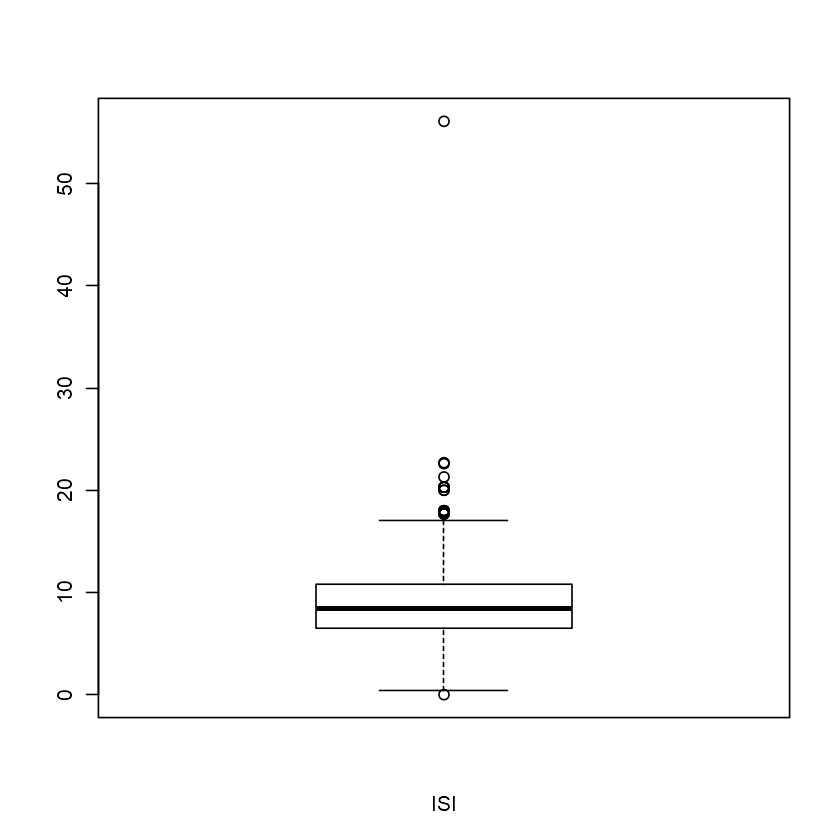

$stats
     [,1]
[1,]  4.6
[2,] 15.5
[3,] 19.3
[4,] 22.8
[5,] 33.3

$n
[1] 517

$conf
         [,1]
[1,] 18.79274
[2,] 19.80726

$out
[1] 2.2 4.2

$group
[1] 1 1

$names
[1] ""



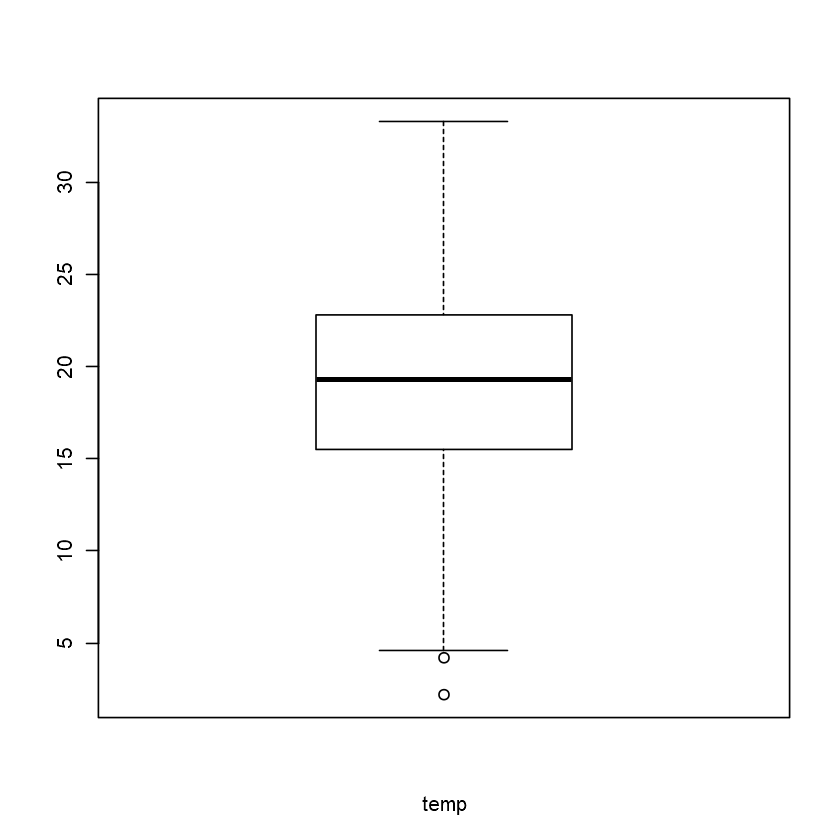

$stats
     [,1]
[1,]   15
[2,]   33
[3,]   42
[4,]   53
[5,]   82
attr(,"class")
          
"integer" 

$n
[1] 517

$conf
         [,1]
[1,] 40.61023
[2,] 43.38977

$out
 [1]  97  99  86  87  96  84  90  90  94  86 100  88

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



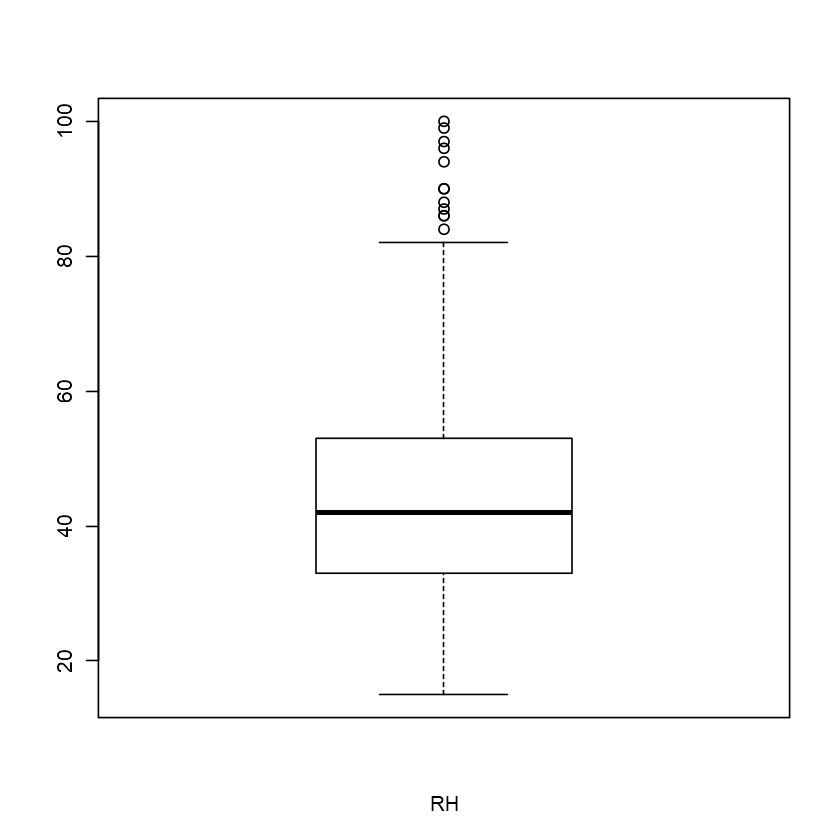

$stats
     [,1]
[1,]  0.4
[2,]  2.7
[3,]  4.0
[4,]  4.9
[5,]  8.0

$n
[1] 517

$conf
         [,1]
[1,] 3.847126
[2,] 4.152874

$out
 [1] 8.9 8.5 9.4 8.5 8.5 8.5 8.5 8.5 8.5 9.4 9.4 9.4 8.5

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



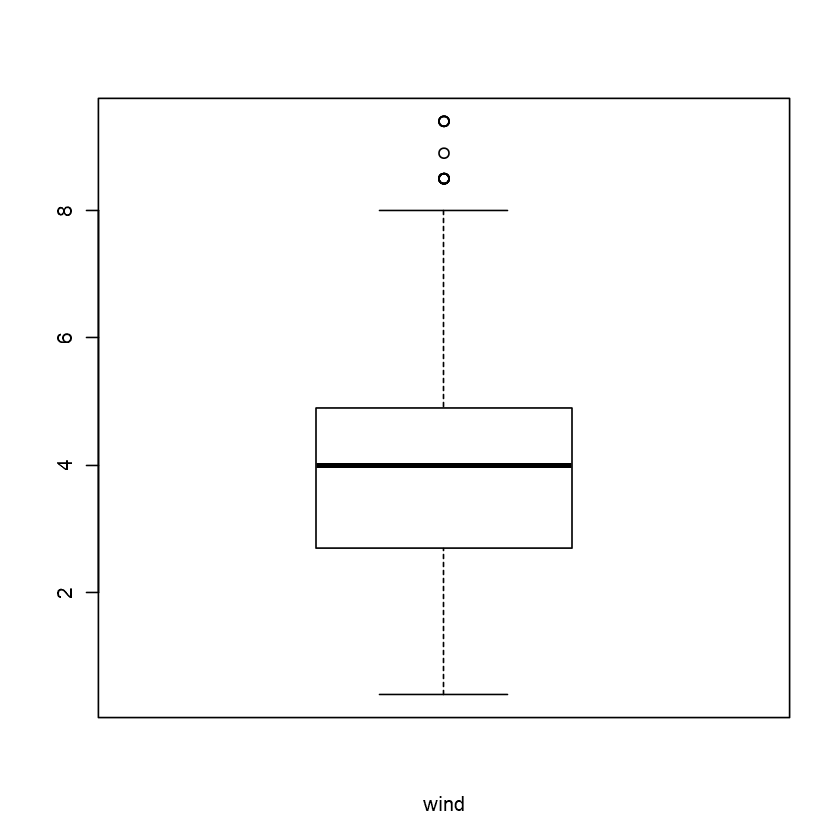

$stats
     [,1]
[1,]    0
[2,]    0
[3,]    0
[4,]    0
[5,]    0

$n
[1] 517

$conf
     [,1]
[1,]    0
[2,]    0

$out
[1] 0.2 1.0 0.2 6.4 0.8 0.8 0.4 1.4

$group
[1] 1 1 1 1 1 1 1 1

$names
[1] ""



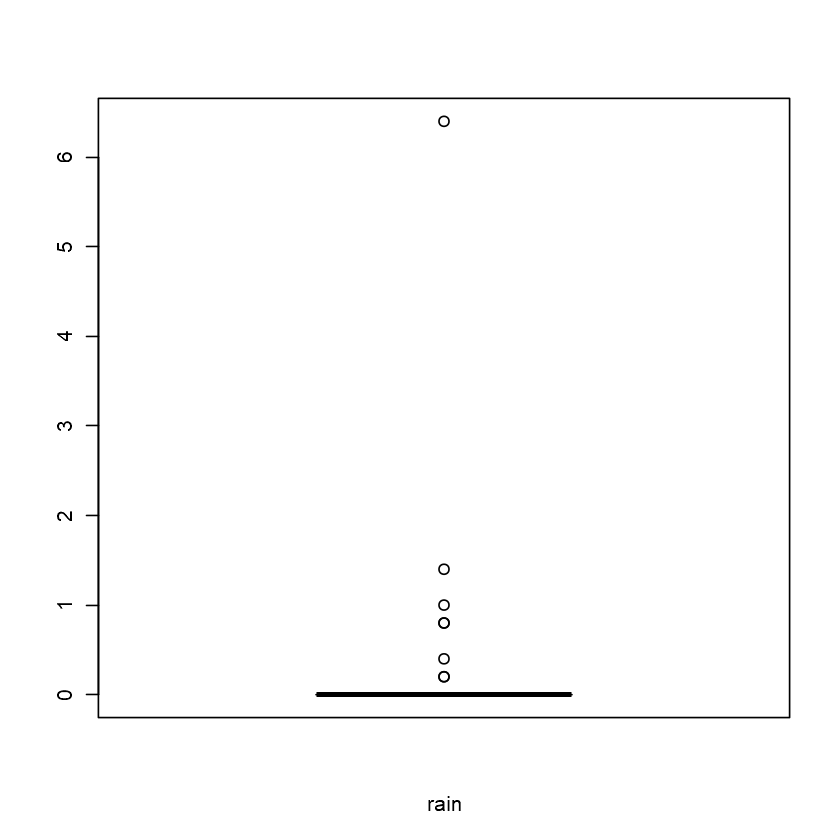

$stats
      [,1]
[1,]  0.00
[2,]  0.00
[3,]  0.52
[4,]  6.57
[5,] 16.40

$n
[1] 517

$conf
           [,1]
[1,] 0.06346173
[2,] 0.97653827

$out
 [1]   17.20   19.23   23.41   24.23   26.00   26.13   27.35   28.66   28.66
[10]   29.48   30.32   31.72   31.86   32.07   35.88   36.85   37.02   37.71
[19]   48.55   49.37   58.30   64.10   71.30   88.49   95.18  103.39  105.66
[28]  154.88  196.48  200.94  212.88 1090.84   17.85   22.03   24.77   24.24
[37]   86.45   34.36   56.04   28.19   20.03   18.30   39.35  174.63   42.87
[46]   24.59   28.74   30.18   70.76   51.78  746.28  185.76   82.75   61.13
[55]   38.48   70.32  278.53   26.43   46.70   43.32   40.54   49.59   54.29

$group
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

$names
[1] ""



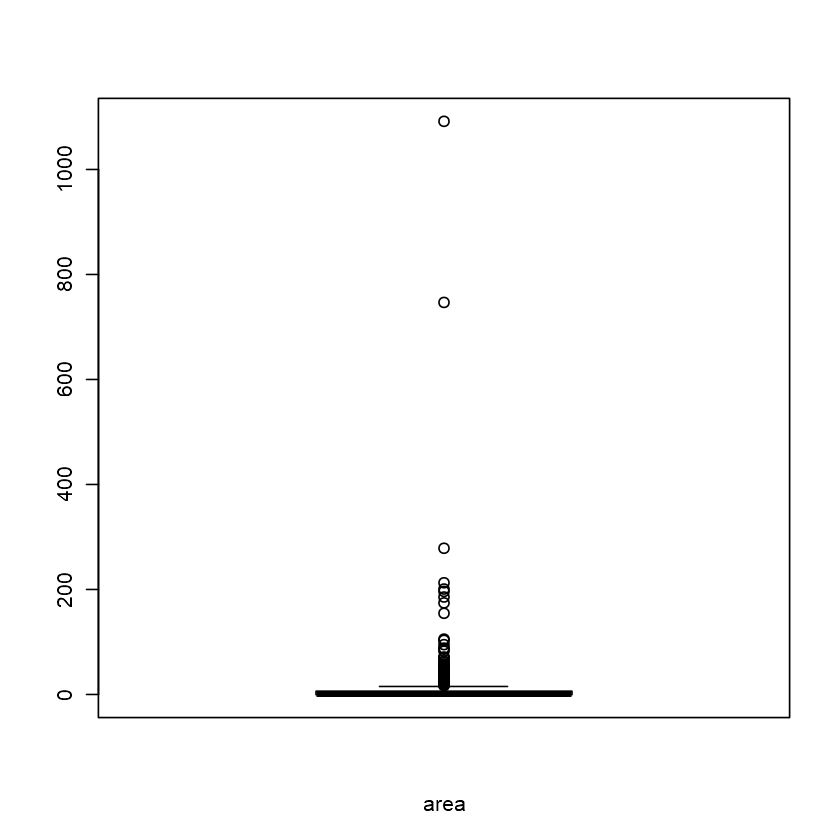

In [ ]:

for ( i in a){
    print(boxplot(df_numerical[,i], xlab = i))
}

The Area Boxplot shows two outliers indicating areas burned over 1000 hectares. These two outliers are going to be removed 

##### Getting rid of Outliers 
 
The data frame gets rids of outliers in area column , we get rid of rows where column of area is more than 400 hect
 The new dataset contains only 515 rows

In [ ]:
df_new = filter(df, area < 400)
nrow(df)
nrow(df_new)
df_trial  = filter(df , area > 0)
nrow(df_trial)

[1] 517

[1] 515

[1] 270

## Categorical variables 

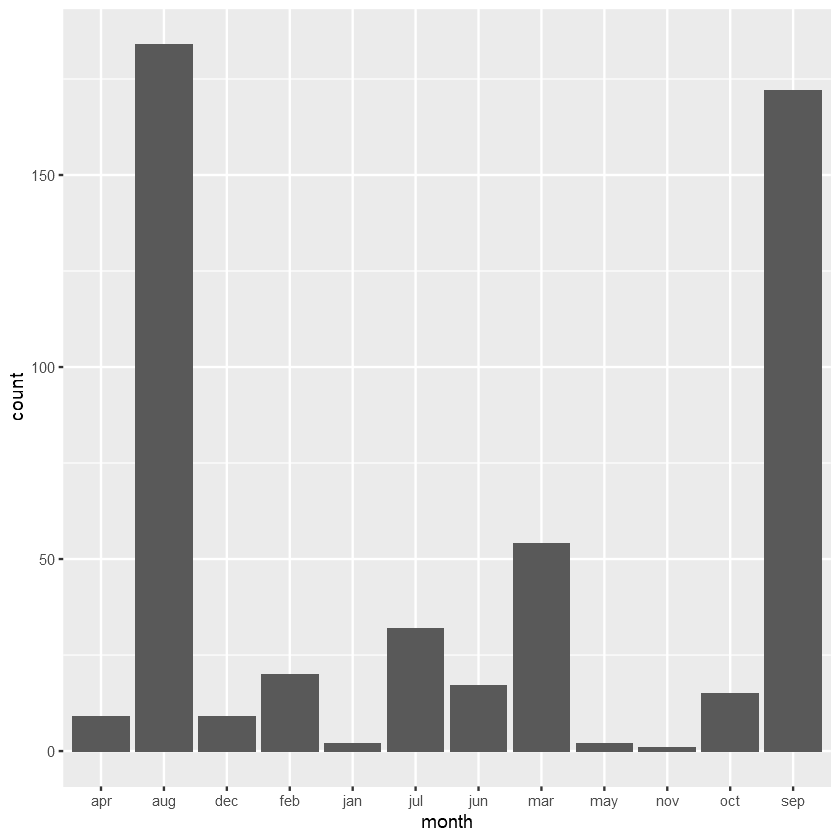

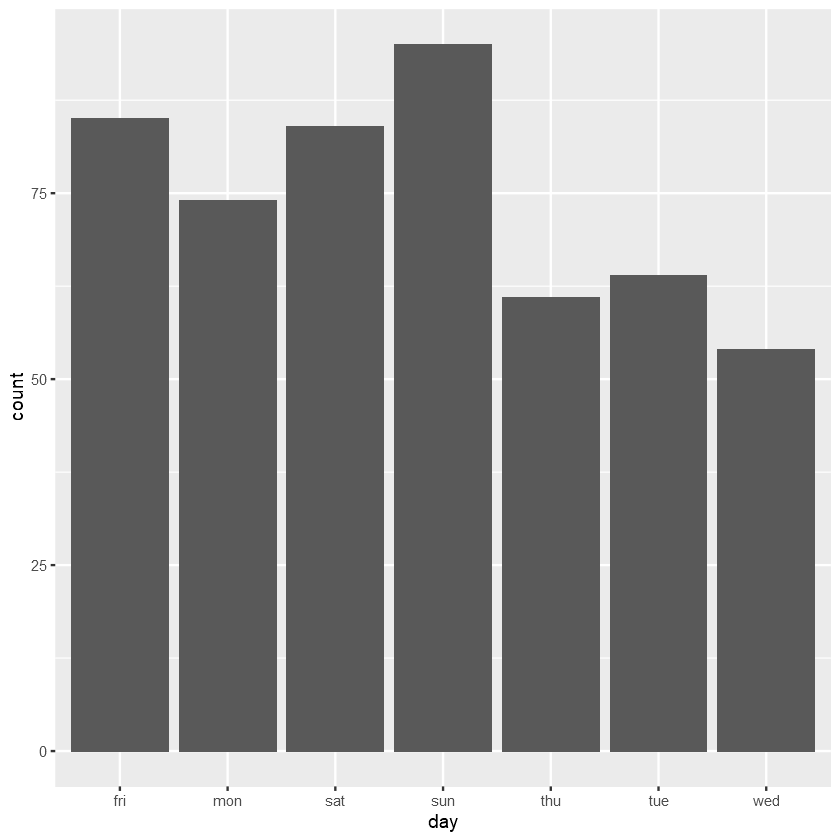

In [ ]:
fig_1 <- ggplot(df_categorical, aes(month))+geom_bar()
fig_2 <- ggplot(df_categorical,aes(day)) + geom_bar()
fig_1
fig_2

## Bi variate analysis 

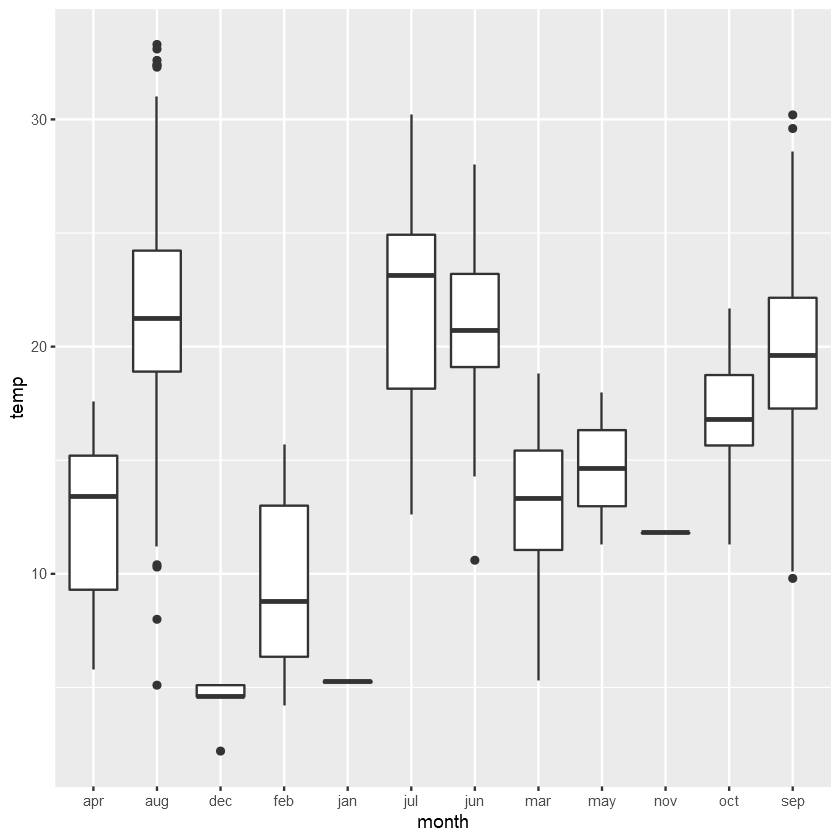

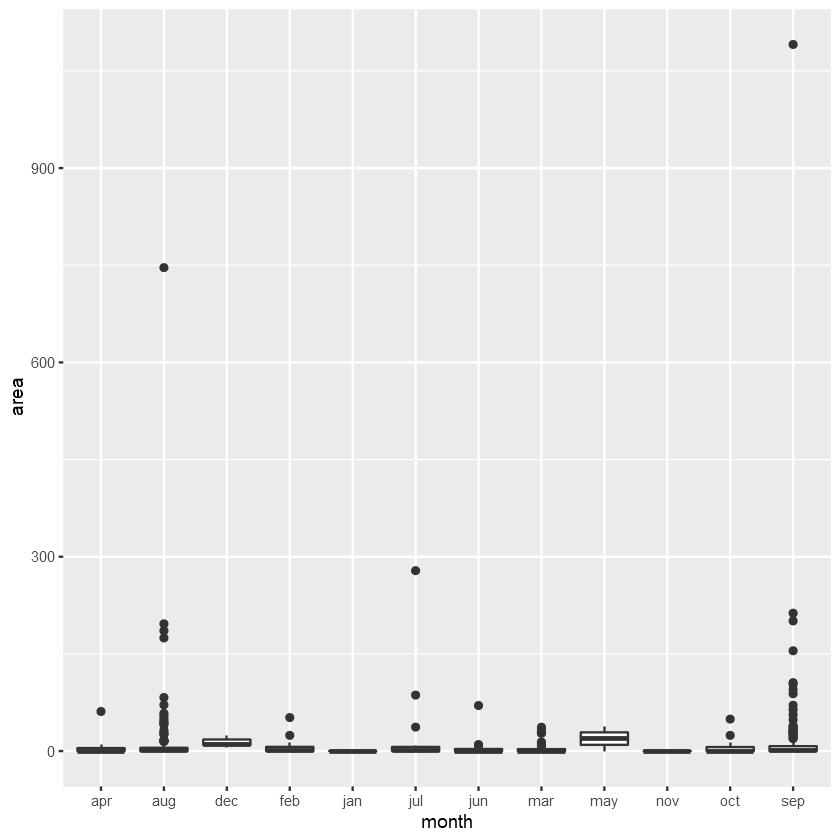

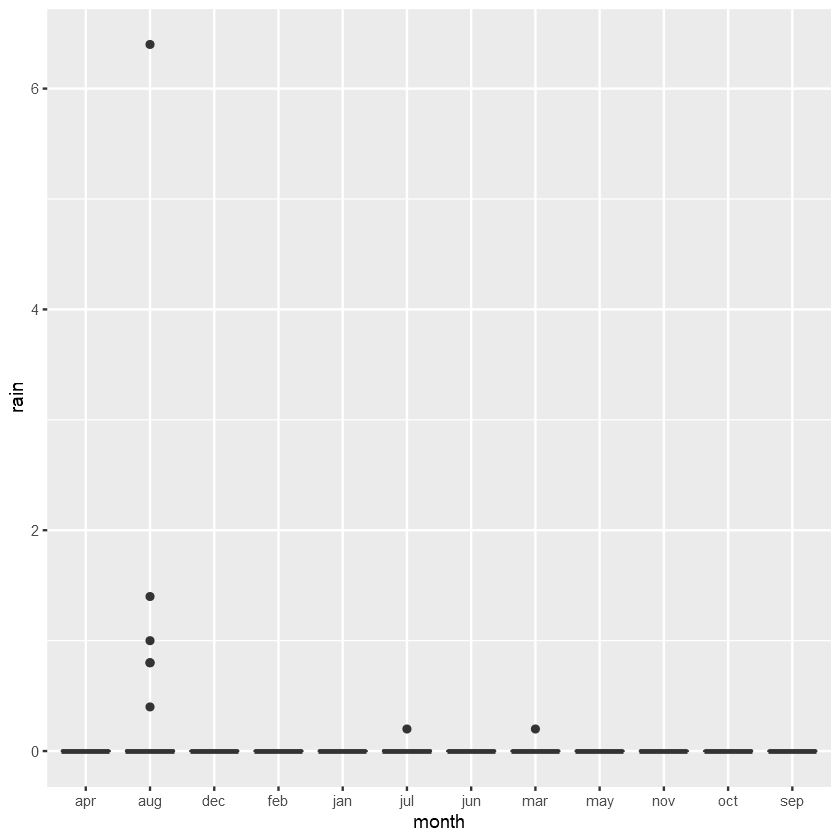

In [ ]:
fig_3<-ggplot(aes(y = temp , x = month ), data = df) + geom_boxplot()
fig_4 <- ggplot(aes(y = area , x = month ), data = df) + geom_boxplot()
fig_5 <- ggplot(aes(y = rain , x = month ), data = df) + geom_boxplot()

fig_3
fig_4
fig_5

In [ ]:
fig_6 <- ggplot(aes(y = area , x = month ), data = df) + geom_boxplot()


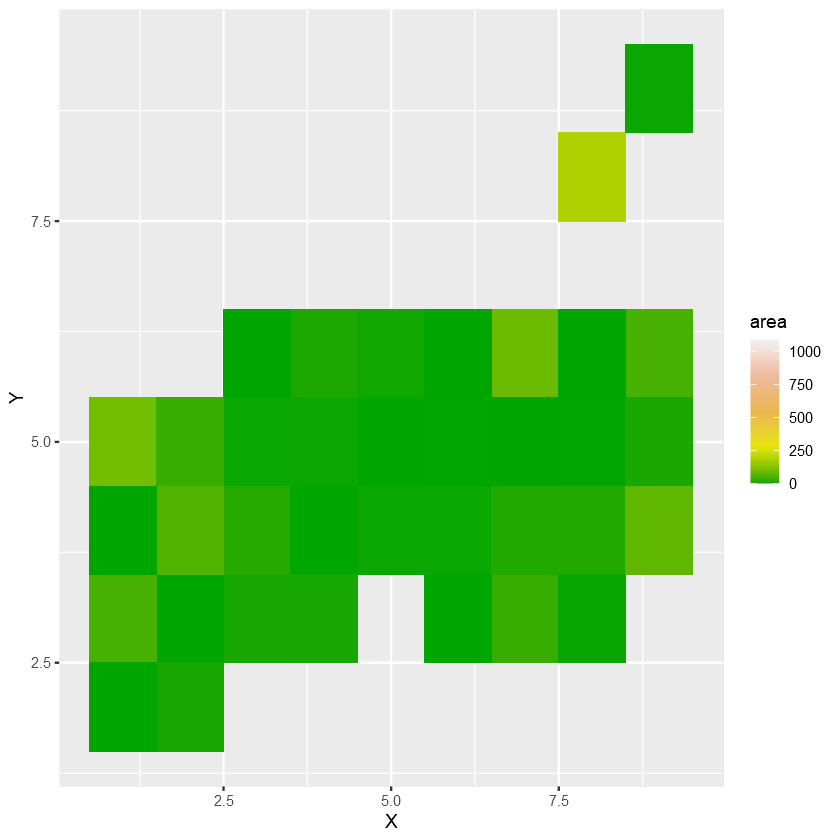

In [ ]:
## Heat map
fig_7 <- ggplot(df,aes(x=X,y=Y))+geom_tile(aes(fill=area))  +scale_fill_gradientn(colours = terrain.colors(5))



fig_7

######     geographical   heat  map shows the fire started from the outside and spread inwards and died soon , so only few areas were burned , now we examine all weather conditons for possible explanations and max amount of area burnt down was not more than 250 -270  hectares

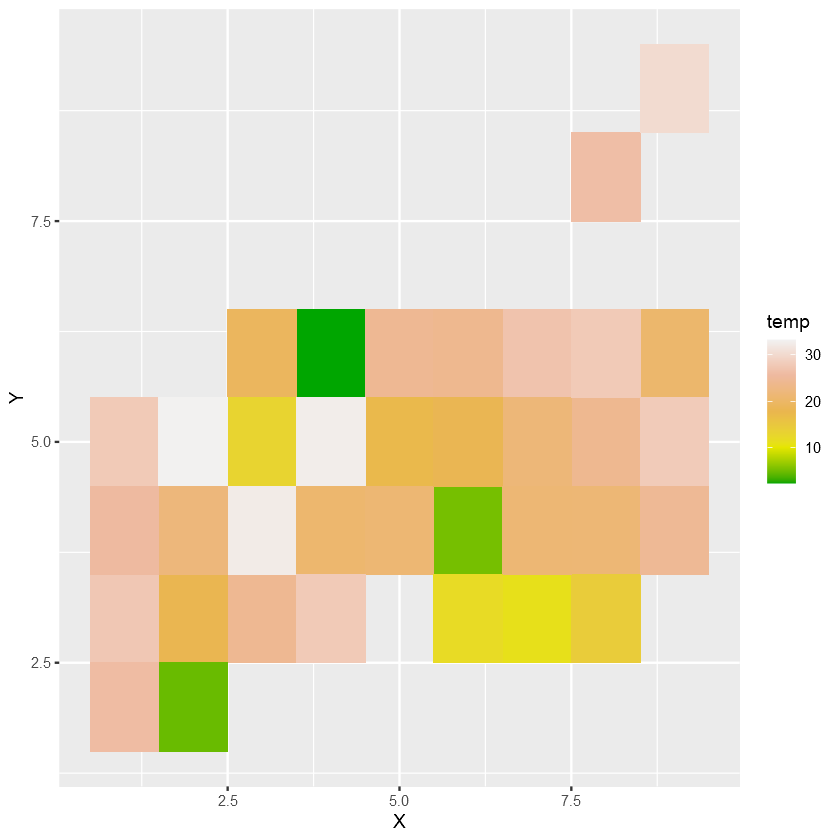

In [ ]:
fig_8 <- ggplot(df,aes(x=X,y=Y))+geom_tile(aes(fill=temp))  +scale_fill_gradientn(colours = terrain.colors(5))

fig_8

###### we kno that temp is one of the main factors for forest fires , all the areas which burned down had soaring tempertures , the inner part of the forest was cooler and and maybe the fire didnt origiate  there because it was relatively cooler. 

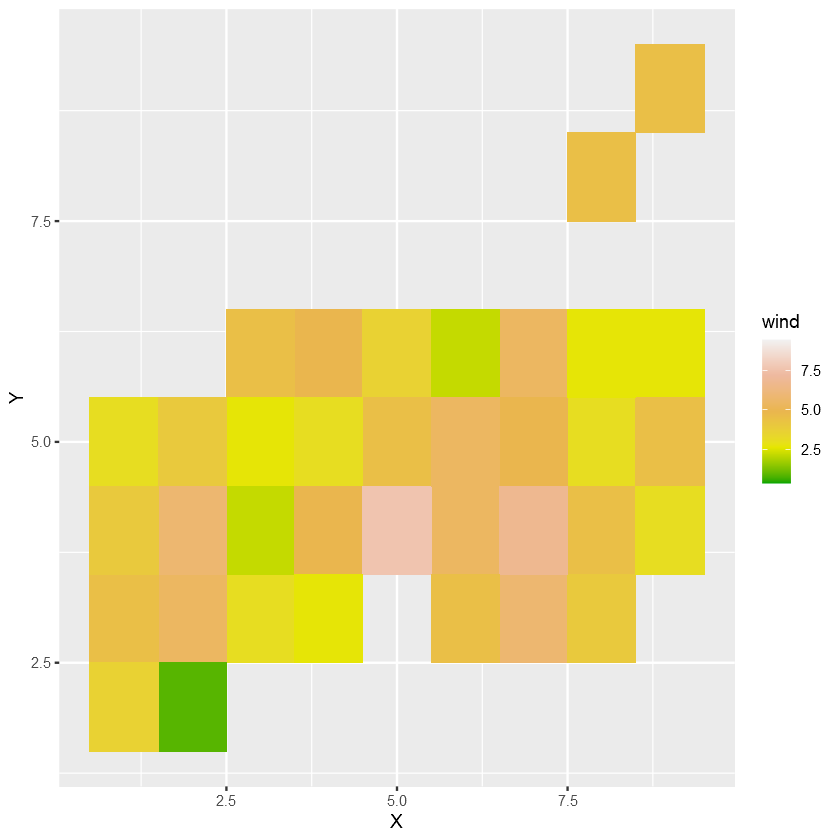

In [ ]:
fig_9 <- ggplot(df,aes(x=X,y=Y))+geom_tile(aes(fill=wind))  +scale_fill_gradientn(colours = terrain.colors(5))
fig_9

##### Looks like  wind was one of the factors for the fire to spread and windy regions looked like they were affected the most

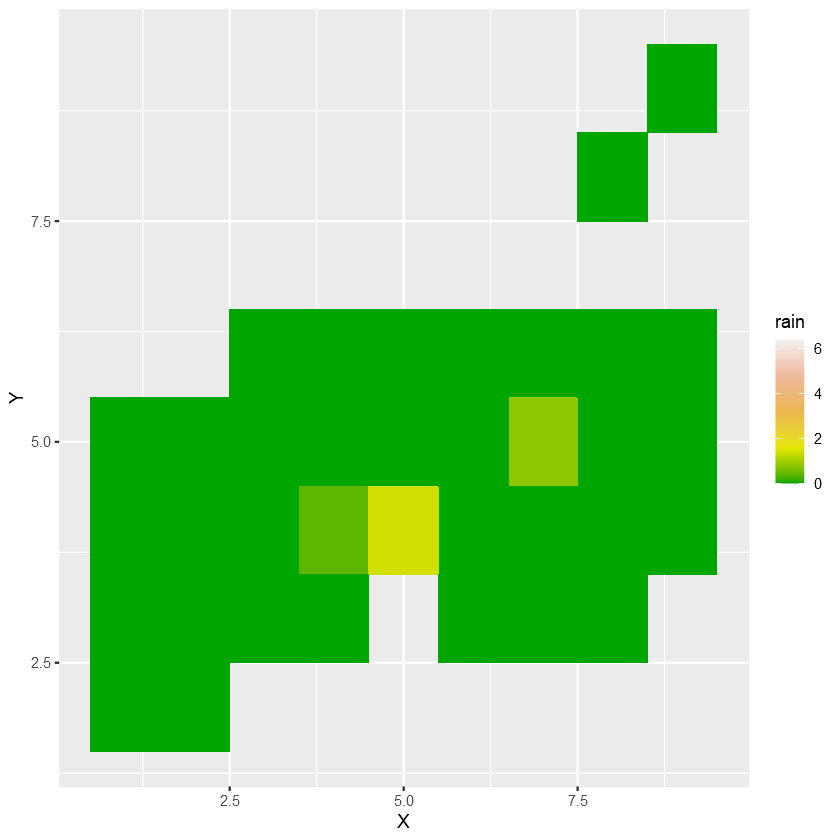

In [ ]:
fig_10 <- ggplot(df,aes(x=X,y=Y))+geom_tile(aes(fill=rain))  +scale_fill_gradientn(colours = terrain.colors(5))



fig_10

###### The rainfall explained lower temperatures in inner regions and hence they were least affected and the box plot above in fig5 shows that even though there was rainfall in august , the temperatures were really high . The month of september had very little rainfall and had high temperatures , hence explains the large amount of area burnt 

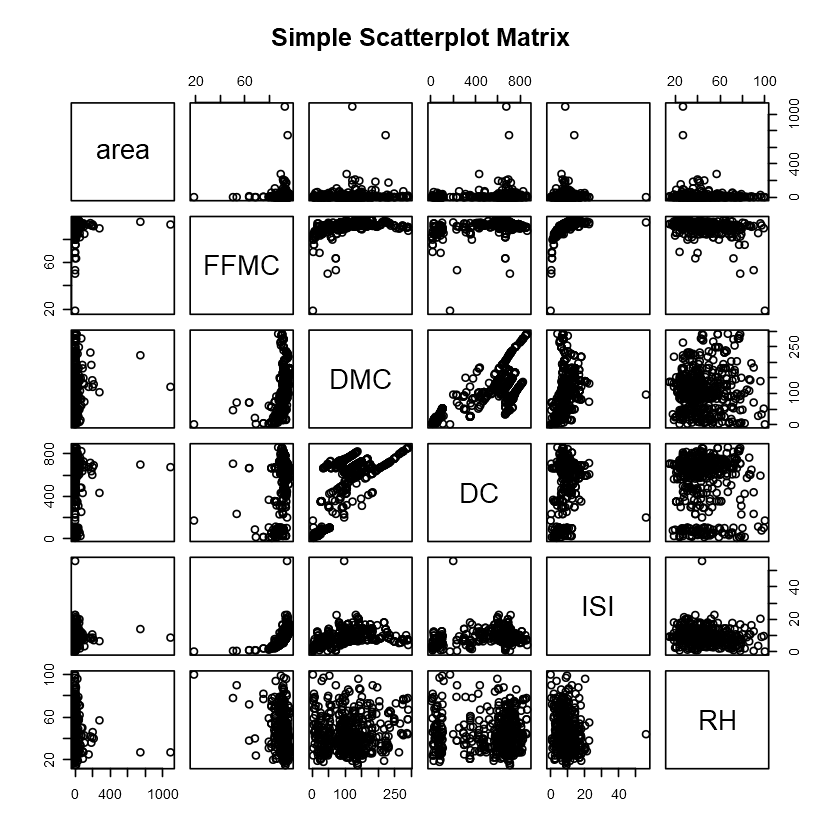

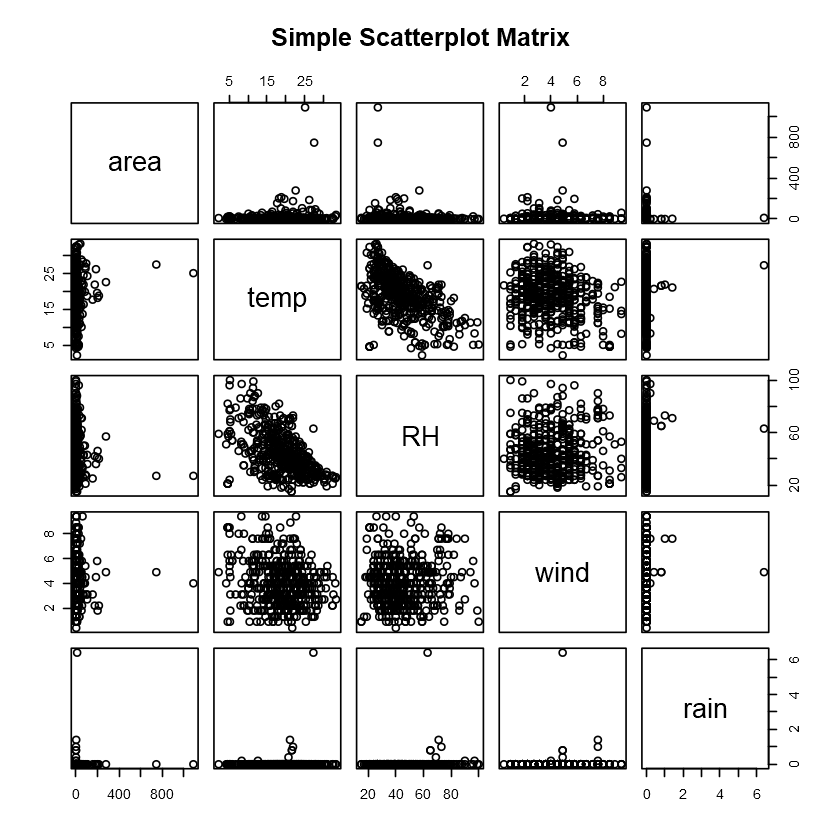

In [ ]:
pairs(~area + FFMC+DMC+DC+ISI + RH,data=df,main="Simple Scatterplot Matrix")
pairs(~area + temp+RH+wind+rain + RH,data=df,main="Simple Scatterplot Matrix")

# Understanding Variables:
#### FFMC

The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel. The FFMC indicates the relative ease of ignition and flammability of fine fuels. Thus, the FFMC is used as an indicator of ignition potential or the potential for fires to start and spread in the area. (Fine Fuels: Slash fuels, grassland, lalang, bushes etc)

##### DMC 

The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.



##### DC
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

##### ISI
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It combines the effects of wind and the FFMC on rate of spread without the influence of variable quantities of fuel. The above  three fuel moisture codes are then used to calculate the initial spread index (ISI) .The ISI estimates the combined effects of
wind speed and the FFMC on potential fire spread by  using a simple exponential function of wind speed

##### RH
Relative humidity (RH) is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature. Relative humidity depends on temperature and the pressure of the system of interest. The same amount of water vapor results in higher relative humidity in cool air than warm air.


##### Observations
Clear linear relations are not established betweeen variables , so we will now transform variables to observe data trends.

From the above histogram we see most variables are skewed and do not follow a normal distribution 
 FFMC and DC will take  square root tranformation since they are skewed to the left  whereas area and rain seems to be skewed to the right and perform log trasformation on this 
 

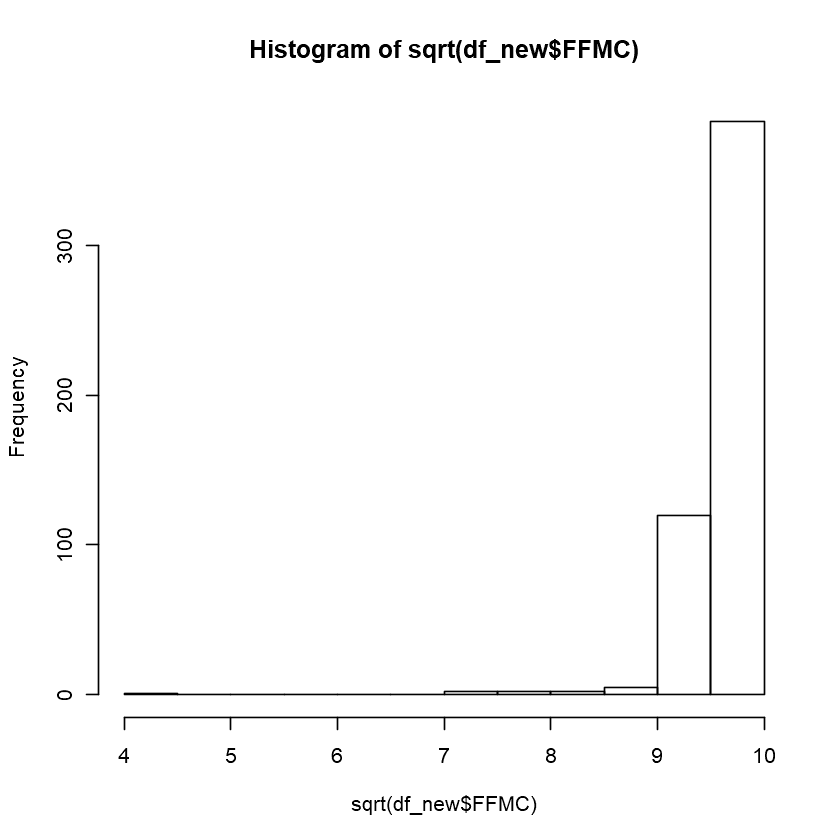

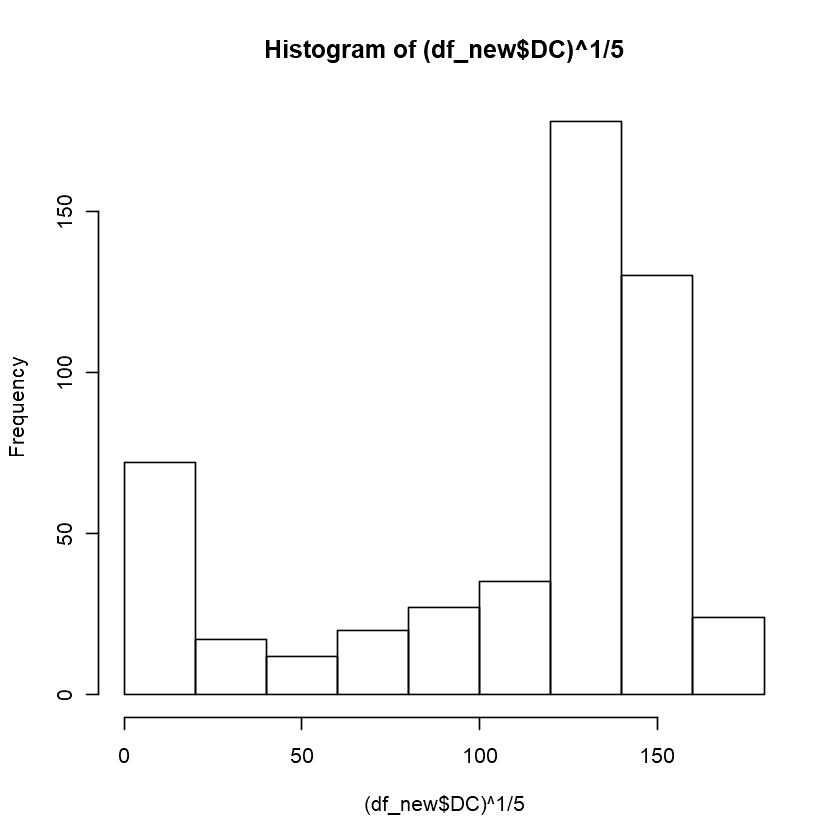

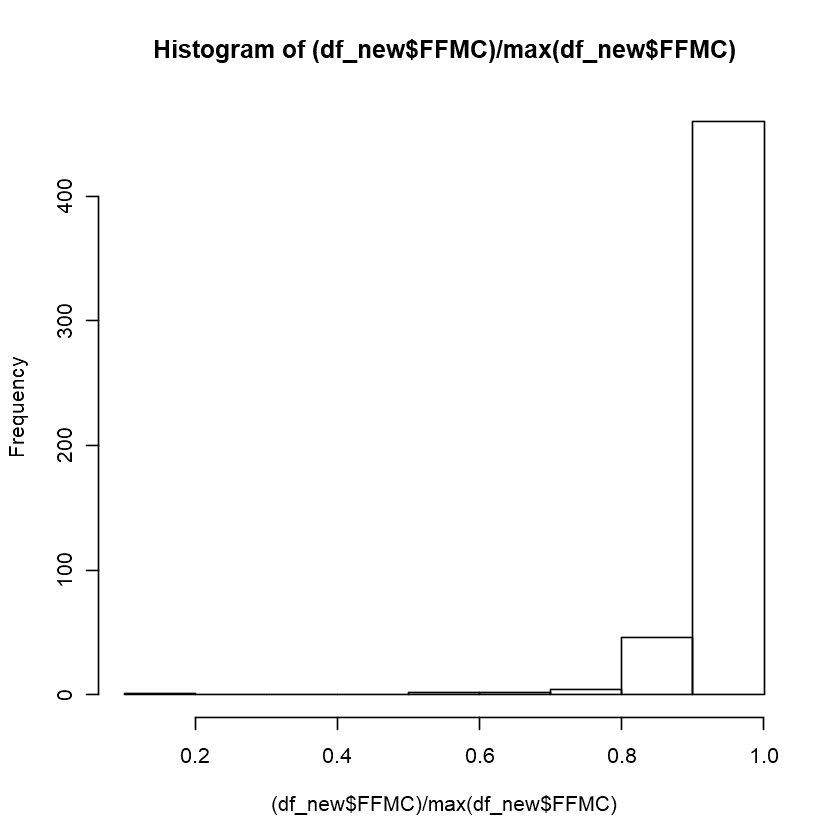

In [ ]:
hist(sqrt(df_new$FFMC)) 
hist((df_new$DC)^1/5) 
hist((df_new$FFMC)/max(df_new$FFMC))

Even after transformaton , these variables do not roughly show a normal distribution 


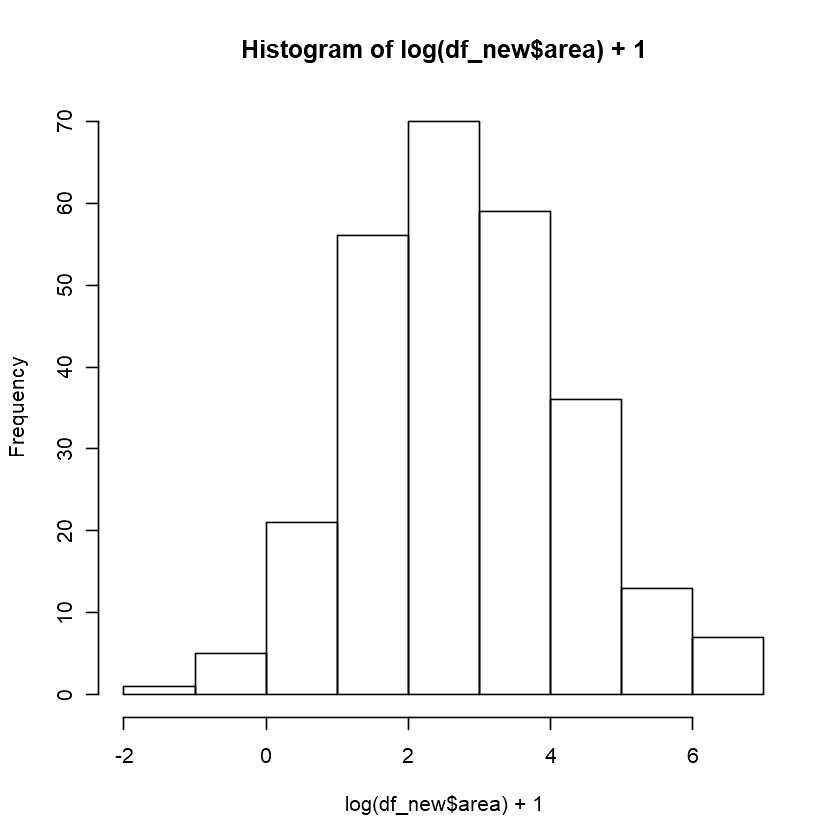

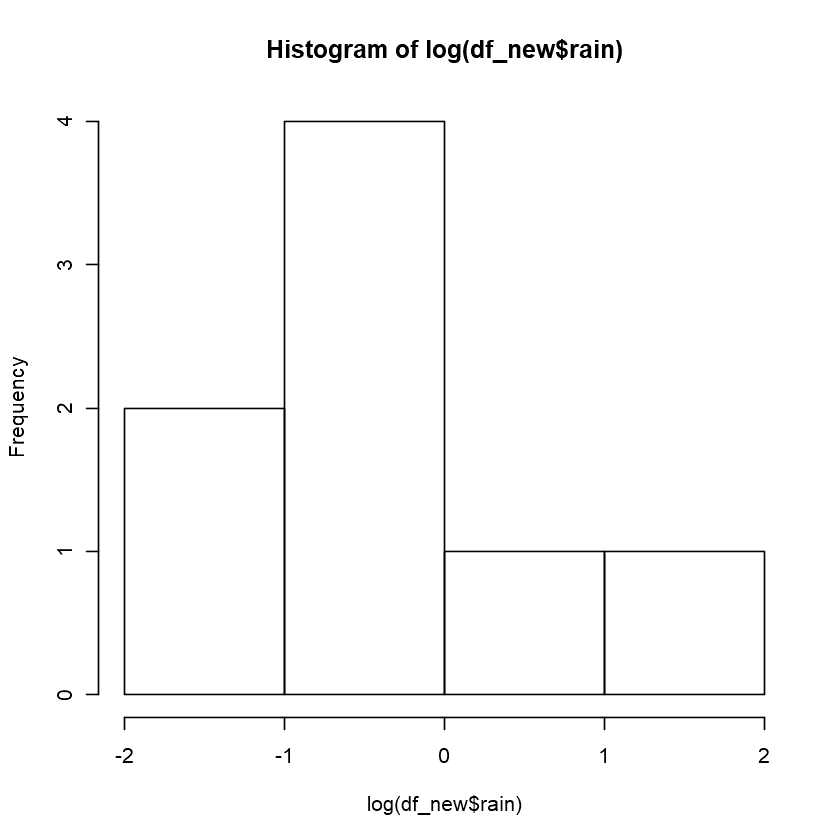

In [ ]:
hist(log(df_new$area)+1)             # adding 1 gets rid of the log(0) value for undefined values 
hist(log(df_new$rain))    

After Log transformations we see that both of these values follow normal distribution

### Correlation matrix 

Observe correlations between variables through correlation matrix

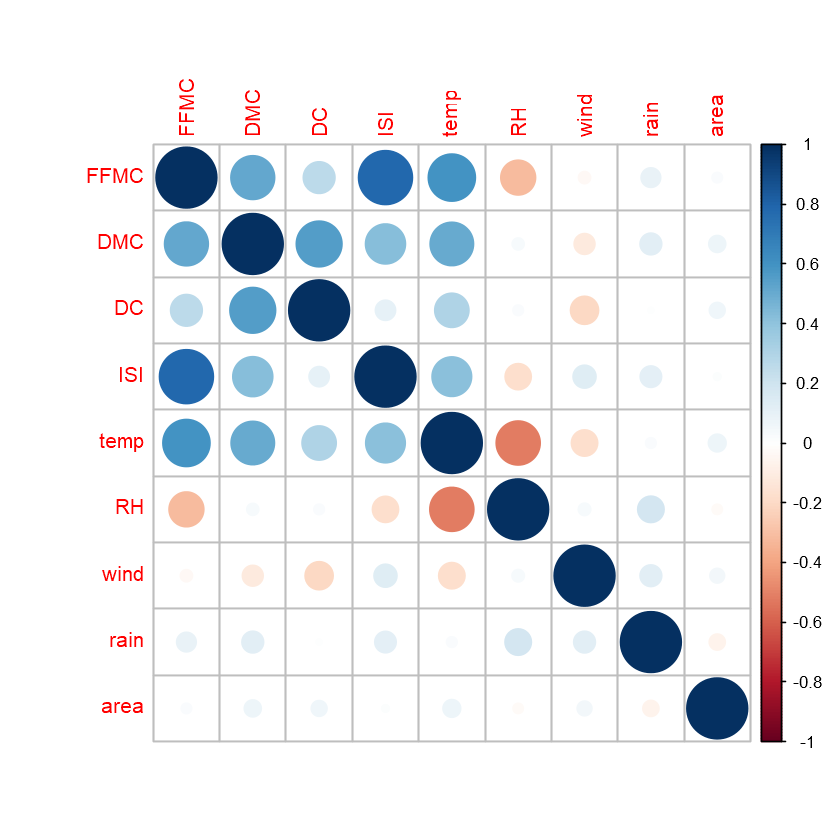

In [ ]:
mydata.cor = cor(df_numerical, method = c("spearman"))
corrplot(mydata.cor)

We observe That there is a correlation of more than  > 0.7 between ISI and FFMC , hence this may imply correlation but not causality  , we get rid of ISI since it has high correlation not only with FFMC BUT also DC .  
RH and temperture are negatively correlated , same with case of RH and FFMC, Temp also affects DMC and ISI which are posotively correlated

Based of correlation matrix , the main factors which contribute towards forest fires is DMC , DC and temp
 Based on this , we see FFMC and temp are posotively correlated 

## Fitting models
#### Chosen models:
###### Linear Regression

First we fit the basic linear regression model with all variables . We use 10 cross validation 



We consider a dats et where the area burned is greater than zero since we are only interested in reasons as to why this occurs 

In [ ]:
df_new  = filter(df_new , area > 0)
nrow(df_trial)

[1] 270

In [ ]:
install.packages("caret")
library(caret)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"

In [ ]:
install.packages("caTools")
library(caTools)



#use caTools function to split, SplitRatio for 70%:30% splitting
data1= sample.split(df_new,SplitRatio = 0.8)

#subsetting into Train data
train =subset(df_new,data1==TRUE)

#subsetting into Test data
test =subset(df_new,data1==FALSE)

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\GHOST\AppData\Local\Temp\RtmpsxUVNk\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [ ]:
nrow(train)
nrow(test)


[1] 205

[1] 63

In [ ]:
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)
# Train the model
model_1<- train(area ~., data = train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_1) 

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

Linear Regression 

205 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 184, 185, 184, 185, 185, 184, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  36.92062  0.04717151  23.84587

Tuning parameter 'intercept' was held constant at a value of TRUE


In [ ]:
predictions<-predict(model_1,test)
predictions

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"

1          3          8         14         16         21         27 
 60.030512  24.702346  21.588764  47.626251   4.801474  13.726068  28.866135 
        29         34         40         42         47         53         55 
 13.955441  28.378210  11.964429  35.326041  17.971621  -4.527119   7.870490 
        60         66         68         73         79         81         86 
 11.225670  33.641000  11.652527  19.156113  23.100945  28.824531  44.742135 
        92         94         99        105        107        112        118 
 35.753311  23.677372  24.290099  28.841575  24.626389  29.032727  21.575984 
       120        125        131        133        138        144        146 
 30.322729  10.877619  15.973909  -4.692083  21.040604  21.944073  15.076940 
       151        157        159        164        170        172        177 
  6.072854   9.168496  22.589537  14.451397  12.522139   9.171543   2.080410 
       183        185        190        196        198        203        209 
 19.568425  19.627524  20.119712  13.513879  27.970563   2.820667  33.061684 
       211        216        222        224        229        235        237 
 29.943398  23.484005   2.478597  36.353562  31.331211  16.752336   2.304920 
       242        248        250        255        261        263        268 
 -1.873762  14.133481  19.147005  13.084623  -1.402079 -12.996049  20.265445

In [ ]:
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10)


# Train the model
model_2<- train(log(area) ~ X + Y + month + day + sqrt(FFMC) + DMC + sqrt(DC) +temp + RH + wind + rain  , data = train, method = "lm",
               trControl = train.control)
# Summarize the results
print(model_2) 

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(modelFit, newdat

Linear Regression 

205 samples
 11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 185, 184, 184, 185, 185, 184, ... 
Resampling results:

  RMSE      Rsquared    MAE     
  1.599288  0.04552083  1.268418

Tuning parameter 'intercept' was held constant at a value of TRUE


Even after transformation and getting rid of ISI factor does not change our model , Now we do feature selction based on their importance from caret package

lm variable importance

  only 20 most important variables shown (out of 25)

         Overall
DC        2.4263
ISI       1.8864
DMC       1.7528
monthsep  1.7299
monthoct  1.5447
monthaug  1.5059
X         1.4702
daytue    1.3811
monthjul  1.3476
daywed    1.0621
wind      0.9120
monthfeb  0.7949
daysat    0.7828
daysun    0.6678
monthmar  0.6592
daymon    0.6345
monthdec  0.6019
daythu    0.4818
rain      0.4554
FFMC      0.4389


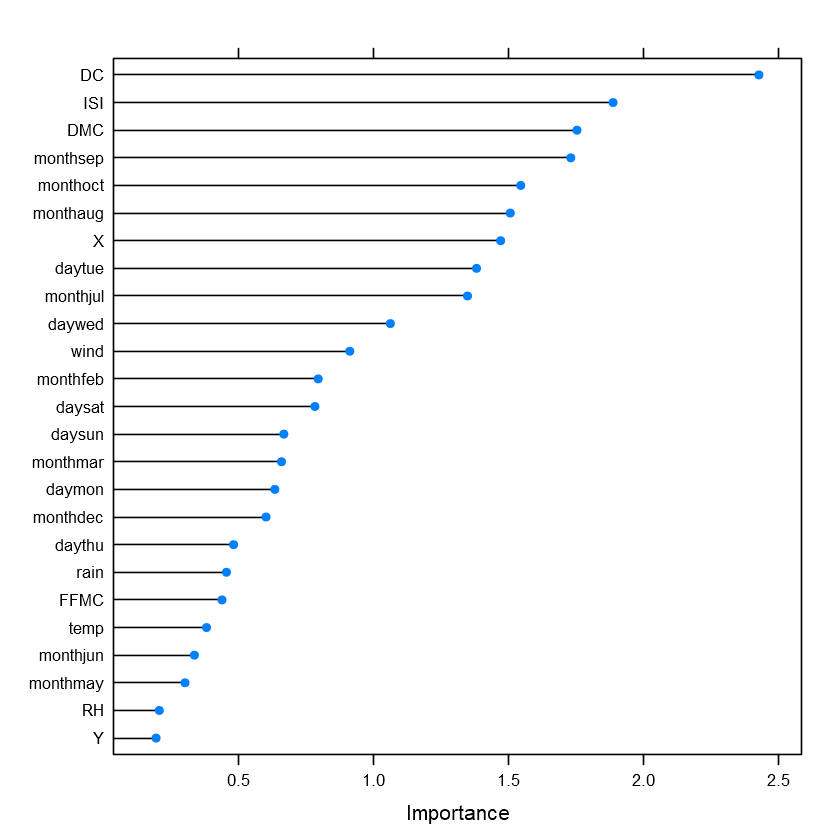

In [ ]:
feature_rank <-varImp(model_1, scale=FALSE)
# summarize importance
print(feature_rank)
# plot importance
plot(feature_rank)

#### KNN Regression

In [ ]:
model_3<- train(area ~., data = train, method = "knn",
               trControl = train.control)
# Summarize the results
print(model_3) 

k-Nearest Neighbors 

205 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 185, 184, 184, 184, 184, 184, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared    MAE     
  5  37.29654  0.06845217  22.72379
  7  36.07062  0.05203913  22.37808
  9  35.24152  0.03651025  22.30313

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.


In [ ]:

# Train the model
model_4<- train(log(area) ~ X + Y + month + day + sqrt(FFMC) + DMC + sqrt(DC) +temp + RH + wind + rain  , data = train, method = "knn",
               trControl = train.control)
# Summarize the results
print(model_4) 

k-Nearest Neighbors 

205 samples
 11 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 185, 185, 185, 185, 183, 184, ... 
Resampling results across tuning parameters:

  k  RMSE      Rsquared    MAE     
  5  1.646376  0.04271027  1.370217
  7  1.580422  0.02571213  1.294732
  9  1.571095  0.01759850  1.270592

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 9.


##### Regression Trees

In [ ]:
model_6<- train(area ~., data = train, method = "rpart",
               trControl = train.control)
# Summarize the results
print(model_6) 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

CART 

205 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 185, 185, 182, 185, 185, 184, ... 
Resampling results across tuning parameters:

  cp           RMSE      Rsquared    MAE     
  0.004962536  40.70587  0.04804839  25.23640
  0.032643316  38.82838  0.03606726  23.39326
  0.055844152  34.04838  0.02688360  21.94197

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.05584415.


In [ ]:
model_5<- train(log(area) ~ X + Y + month + day + sqrt(FFMC) + DMC + sqrt(DC) +temp + RH + wind + rain  , data = train, method = "rpart",
               trControl = train.control)
# Summarize the results
print(model_5) 

#### Conclusion

The model with good rsquare value close to one is a better performing model  , most rsquare values are less 0.5 which indicates these regresion techniques are not very suitable . Lower RSME values are better  , however when transformation are done and ISI factor is removed the RMSE significantly decreases